# Circuit VS_CS_R4

In [ ]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts

## The circuit model shows in below.

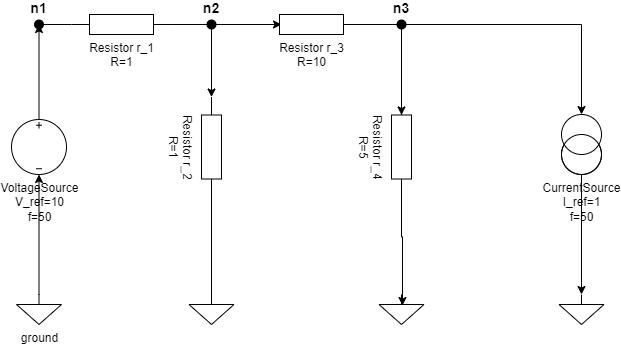

## DPsim EMT

In [ ]:
# DPsim EMT simulation
import dpsimpy

name = 'EMT_VS_CS_R4_AC'

# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 = dpsimpy.emt.SimNode('n1')
n2 = dpsimpy.emt.SimNode('n2')
n3 = dpsimpy.emt.SimNode('n3')

# Components
vs = dpsimpy.emt.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(10, 0), f_src=50)
r1 = dpsimpy.emt.ph1.Resistor('r1')
r1.set_parameters(R=1)
r2 = dpsimpy.emt.ph1.Resistor('r2')
r2.set_parameters(R=1)
r3 = dpsimpy.emt.ph1.Resistor('r3')
r3.set_parameters(R=10)
r4 = dpsimpy.emt.ph1.Resistor('r4')
r4.set_parameters(R=5)
cs = dpsimpy.emt.ph1.CurrentSource('cs')
cs.set_parameters(I_ref=complex(1,0), f_src=50)

vs.connect([gnd, n1])
r1.connect([n1, n2])
r2.connect([n2, gnd])
r3.connect([n2, n3])
r4.connect([n3, gnd])
cs.connect([gnd, n3])

system = dpsimpy.SystemTopology(50, [gnd, n1, n2, n3], [vs, r1, r2, r3, r4, cs])

logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1);
logger.log_attribute('n2.v', 'v', n2);
logger.log_attribute('n3.v', 'v', n3);
logger.log_attribute('r1.i_intf', 'i_intf', r1);
logger.log_attribute('r3.i_intf', 'i_intf', r3);

sim = dpsimpy.Simulation(name)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_system(system)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)
sim.add_logger(logger)

sim.run()

In [ ]:
# read EMT results
work_dir = 'logs/'
log_name = 'EMT_VS_CS_R4_AC'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

In [ ]:
ts_dpsim_emt['n1.v'].label = 'v1 EMT'
ts_dpsim_emt['n2.v'].label = 'v2 EMT'
ts_dpsim_emt['n3.v'].label = 'v3 EMT'
ts_dpsim_emt['r1.i_intf'].label = 'i12 EMT'
ts_dpsim_emt['r3.i_intf'].label = 'i23 EMT'
pt.plot_timeseries(1, ts_dpsim_emt['n1.v'])
pt.plot_timeseries(1, ts_dpsim_emt['n2.v'])
pt.plot_timeseries(1, ts_dpsim_emt['n3.v'])
pt.plot_timeseries(2, ts_dpsim_emt['r1.i_intf'])
pt.plot_timeseries(2, ts_dpsim_emt['r3.i_intf'])

## DPsim DP

In [ ]:
# DPsim DP simulation
import dpsimpy

name = 'DP_VS_CS_R4_AC'

# Nodes
gnd = dpsimpy.dp.SimNode.gnd
n1 = dpsimpy.dp.SimNode('n1')
n2 = dpsimpy.dp.SimNode('n2')
n3 = dpsimpy.dp.SimNode('n3')

# Components
vs = dpsimpy.dp.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(10, 0))
r1 = dpsimpy.dp.ph1.Resistor('r1')
r1.set_parameters(R=1)
r2 = dpsimpy.dp.ph1.Resistor('r2')
r2.set_parameters(R=1)
r3 = dpsimpy.dp.ph1.Resistor('r3')
r3.set_parameters(R=10)
r4 = dpsimpy.dp.ph1.Resistor('r4')
r4.set_parameters(R=5)
cs = dpsimpy.dp.ph1.CurrentSource('cs')
cs.set_parameters(I_ref=complex(1,0))

vs.connect([gnd, n1])
r1.connect([n1, n2])
r2.connect([n2, gnd])
r3.connect([n2, n3])
r4.connect([n3, gnd])
cs.connect([gnd, n3])

system = dpsimpy.SystemTopology(50, [gnd, n1, n2, n3], [vs, r1, r2, r3, r4, cs])

logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1);
logger.log_attribute('n2.v', 'v', n2);
logger.log_attribute('n3.v', 'v', n3);
logger.log_attribute('r1.i_intf', 'i_intf', r1);
logger.log_attribute('r3.i_intf', 'i_intf', r3);

sim = dpsimpy.Simulation(name)
sim.set_domain(dpsimpy.Domain.DP)
sim.set_system(system)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)
sim.add_logger(logger)

sim.run()

In [ ]:
# read DP results
work_dir = 'logs/'
log_name = 'DP_VS_CS_R4_AC'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

In [ ]:
#convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

In [ ]:
ts_dpsim_dp_emt['n1.v_shift'].label = 'v1 DP'
ts_dpsim_dp_emt['n2.v_shift'].label = 'v2 DP'
ts_dpsim_dp_emt['n3.v_shift'].label = 'v3 DP'
ts_dpsim_dp_emt['r1.i_intf_shift'].label = 'i12 DP'
ts_dpsim_dp_emt['r3.i_intf_shift'].label = 'i23 DP'
pt.plot_timeseries(1, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(1, ts_dpsim_dp_emt['n2.v_shift'])
pt.plot_timeseries(1, ts_dpsim_dp_emt['n3.v_shift'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['r1.i_intf_shift'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['r3.i_intf_shift'])

## Simulink reference results

In [ ]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/Circuits/SL_VS_CS_R4.csv'
local_file = 'reference-results/SL_VS_CS_R4.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl = rt.read_timeseries_simulink(local_file)

In [ ]:
pt.set_timeseries_labels(ts_sl['v1'], 'v1 SL')
pt.set_timeseries_labels(ts_sl['v2'], 'v2 SL')
pt.set_timeseries_labels(ts_sl['v3'], 'v3 SL')
pt.set_timeseries_labels(ts_sl['i12'], 'i12 SL')
pt.set_timeseries_labels(ts_sl['i23'], 'i23 SL')
pt.plot_timeseries(1, ts_sl['v1'])
pt.plot_timeseries(1, ts_sl['v2'])
pt.plot_timeseries(1, ts_sl['v3'])
pt.plot_timeseries(2, ts_sl['i12'])
pt.plot_timeseries(2, ts_sl['i23'])

## Comparison

In [ ]:
# plot v1
pt.plot_timeseries(1, ts_dpsim_emt['n1.v'])
pt.plot_timeseries(1, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(1, ts_sl['v1'])
# plot v2
pt.plot_timeseries(2, ts_dpsim_emt['n2.v'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['n2.v_shift'])
pt.plot_timeseries(2, ts_sl['v2'])
# plot v3
pt.plot_timeseries(3, ts_dpsim_emt['n1.v'])
pt.plot_timeseries(3, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(3, ts_sl['v3'])
# plot i12
pt.plot_timeseries(4, ts_dpsim_emt['r1.i_intf'])
pt.plot_timeseries(4, ts_dpsim_dp_emt['r1.i_intf_shift'])
ts_sl_scale =  ts_sl['i12'].scale(-1)
ts_sl_scale.label = '-i12 SL'
pt.plot_timeseries(4, ts_sl_scale)
# plot i34
pt.plot_timeseries(5, ts_dpsim_emt['r3.i_intf'])
pt.plot_timeseries(5, ts_dpsim_dp_emt['r3.i_intf_shift'])
pt.plot_timeseries(5, ts_sl['i23'])

In [ ]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += ts.rmse(ts_sl['v1'], ts_dpsim_emt['n1.v'])
err_sl_emt += ts.rmse(ts_sl['v2'], ts_dpsim_emt['n2.v'])
err_sl_emt += ts.rmse(ts_sl['v3'], ts_dpsim_emt['n3.v'])
err_sl_emt = err_sl_emt / 3
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += ts.rmse(ts_sl['v1'], ts_dpsim_dp_emt['n1.v_shift'])
err_sl_dp += ts.rmse(ts_sl['v2'], ts_dpsim_dp_emt['n2.v_shift'])
err_sl_dp += ts.rmse(ts_sl['v3'], ts_dpsim_dp_emt['n3.v_shift'])
err_sl_dp = err_sl_dp / 3
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

In [ ]:
assert err_sl_emt < 0.1
assert err_sl_dp < 0.1